<a href="https://colab.research.google.com/github/MugdhaYada/my_projects-IDS/blob/main/HW6/Problem2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing the Train and Test data of Loans data set
library(readr)
Loans_TrainingDF <- read_csv("https://raw.githubusercontent.com/MugdhaYada/my_projects-IDS/main/HW6/Loans_Training.csv")
Loans_TestDF <- read_csv("https://raw.githubusercontent.com/MugdhaYada/my_projects-IDS/main/HW6/Loans_Test.csv")

Rows: 150302 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Debt-to-Income-Ratio, FICO_Score, Request_Amount, Interest
lgl (1): Approval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 49698 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Debt-to-Income-Ratio, FICO_Score, Request_Amount, Interest
lgl (1): Approval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
#Printing the 10 records of Training set of Loans Dataset
head(Loans_TrainingDF,10)

Approval,Debt-to-Income-Ratio,FICO_Score,Request_Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,397,1000,450
FALSE,0,403,500,225
FALSE,0,408,1000,450
FALSE,0,408,2000,900
FALSE,0,411,5000,2250
FALSE,0,413,5000,2250
FALSE,0,416,6000,2700
FALSE,0,421,2000,900
FALSE,0,422,12000,5400


In [6]:
#Printing the 10 records of Test set of Loans Dataset
head(Loans_TestDF,10)

Approval,Debt-to-Income-Ratio,FICO_Score,Request_Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,413,2000,900
FALSE,0,449,1000,450
FALSE,0,454,6000,2700
FALSE,0,456,1000,450
FALSE,0,457,1000,450
FALSE,0,457,8000,3600
FALSE,0,459,8000,3600
FALSE,0,461,500,225
FALSE,0,461,6000,2700


In [7]:
#Checking the internal structure of Training Dataset of Loans
str(Loans_TrainingDF)

spec_tbl_df [150,302 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval            : logi [1:150302] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt-to-Income-Ratio: num [1:150302] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:150302] 397 403 408 408 411 413 416 421 422 432 ...
 $ Request_Amount      : num [1:150302] 1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num [1:150302] 450 225 450 900 2250 2250 2700 900 5400 4500 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   `Debt-to-Income-Ratio` = col_double(),
  ..   FICO_Score = col_double(),
  ..   Request_Amount = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [8]:
#Checking the internal structure of Test Dataset of Loans
str(Loans_TestDF)

spec_tbl_df [49,698 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval            : logi [1:49698] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt-to-Income-Ratio: num [1:49698] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:49698] 413 449 454 456 457 457 459 461 461 462 ...
 $ Request_Amount      : num [1:49698] 2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest            : num [1:49698] 900 450 2700 450 450 3600 3600 225 2700 8550 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   `Debt-to-Income-Ratio` = col_double(),
  ..   FICO_Score = col_double(),
  ..   Request_Amount = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## **Checking for missing values in Train & Test Data sets**

In [9]:
sum(is.na(Loans_TrainingDF))

[1] 0

In [10]:
sum(is.na(Loans_TestDF))

[1] 0

In [11]:
prop.table(table(Loans_TrainingDF$Approval))


    FALSE      TRUE 
0.4994345 0.5005655 

In [12]:
prop.table(table(Loans_TestDF$Approval))


    FALSE      TRUE 
0.5017103 0.4982897 

**From the above two cells, the prop.table() function shows each individual value as a proportion of the whole.**

In [13]:
#importing the necessary packages
install.packages('rpart.plot')
install.packages('party')
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘matrixStats’, ‘multcomp’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [16]:
#importing the necessary libraries
library(rpart)
library(rpart.plot)
library(party)
library(caret)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## **CART Model**

n= 150302 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150302 75066 TRUE (0.49943447 0.50056553)  
  2) FICO_Score< 659.5 46002  1808 FALSE (0.96069736 0.03930264) *
  3) FICO_Score>=659.5 104300 30872 TRUE (0.29599233 0.70400767)  
    6) Debt-to-Income-Ratio>=0.305 12873  1679 FALSE (0.86957197 0.13042803) *
    7) Debt-to-Income-Ratio< 0.305 91427 19678 TRUE (0.21523182 0.78476818) *

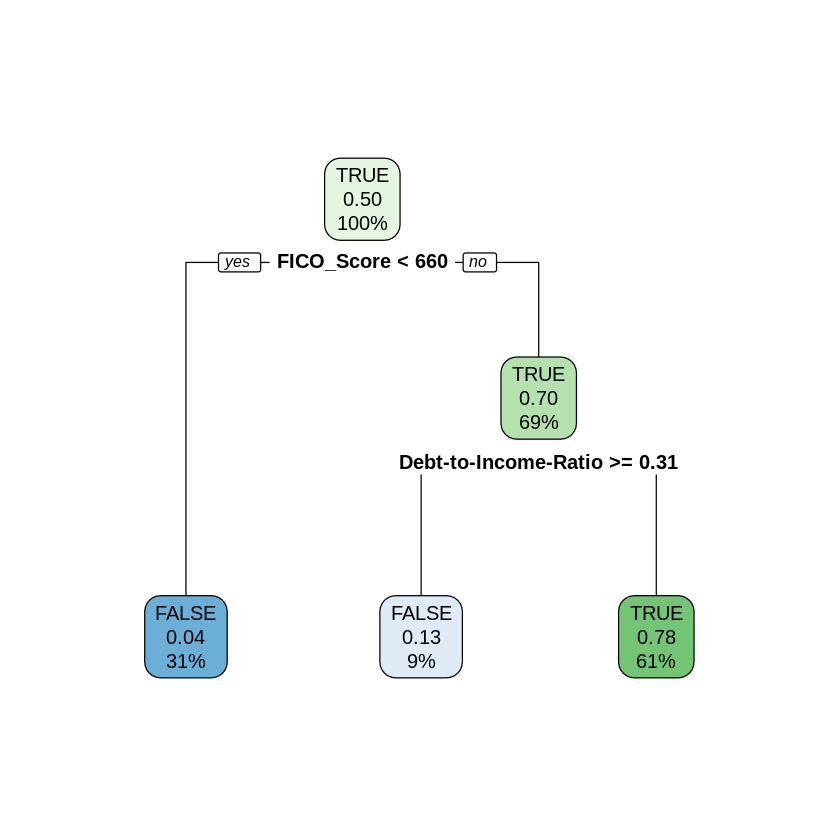

In [17]:
set.seed(150)
CART_model <- rpart(Approval ~., data = Loans_TrainingDF, method = "class")
CART_model

# Plot the trees
rpart.plot(CART_model)

## **Description:**

* Each node indicates the percentage of records that reach that node, as well as the proportion of FICO Score and Debt-to-Income Ratio.

* At the root node split, CART determines that the most effective binary split is to divide the records into two groups based on their FICO Score value, one group with a FICO Score 660 and the other with a FICO Score > 660.

* If the FICO Score < 660 then the loan is rejected with 0.04 and 31%, and if FICO Score > 600 the loan is approved with 0.70 and 69%

* Based on the variable Debt-to-Income Ratio, CART does a second split. If the value of Debt-to-Income Ratio is more than or equal to 0.31, 0.78 and 61% are true, and if it is less than 0.31, 0.13 and 9% are false.

In [18]:
prediction_CART <- predict(CART_model, Loans_TestDF, 'class')
head(prediction_CART)

1     2     3     4     5     6 
FALSE FALSE FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE

# **Confustion Matrix of CART Model**

In [19]:
confusionMatrix(table(Loans_TestDF$Approval, prediction_CART))

Confusion Matrix and Statistics

       prediction_CART
        FALSE  TRUE
  FALSE 18314  6620
  TRUE   1171 23593
                                        
               Accuracy : 0.8432        
                 95% CI : (0.84, 0.8464)
    No Information Rate : 0.6079        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6867        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9399        
            Specificity : 0.7809        
         Pos Pred Value : 0.7345        
         Neg Pred Value : 0.9527        
             Prevalence : 0.3921        
         Detection Rate : 0.3685        
   Detection Prevalence : 0.5017        
      Balanced Accuracy : 0.8604        
                                        
       'Positive' Class : FALSE         
                                        

In [20]:
Accuracy_CARTModel <- sum(prediction_CART == Loans_TestDF$Approval) / length(prediction_CART)*100
print('Accuracy of CART Model is:')
Accuracy_CARTModel

[1] "Accuracy of CART Model is:"


[1] 84.32331

## **C5.0 Model**

In [2]:
install.packages('C50')
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘reshape2’, ‘partykit’, ‘Cubist’




In [21]:
Loans_TrainingDF$Approval = as.factor(Loans_TrainingDF$Approval)
head(Loans_TrainingDF$Approval)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [25]:
C5_Model <- C5.0(x = Loans_TrainingDF[, -1], y = Loans_TrainingDF$Approval, control = C5.0Control(minCases=1000))
C5_Model


Call:
C5.0.default(x = Loans_TrainingDF[, -1], y = Loans_TrainingDF$Approval,
 control = C5.0Control(minCases = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000


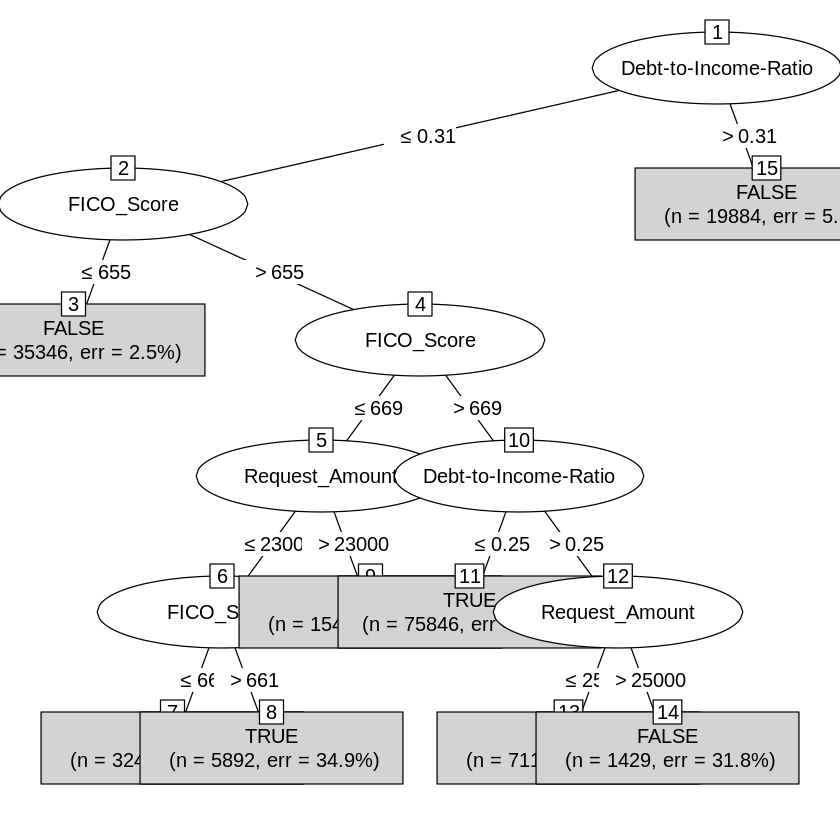

In [27]:
plot(C5_Model, type = 'simple')

## **Description:**

* We can observe that, if the Debt-to-income-ratio > 0.31 then the loan is rejected.
* If the Debt-to-income-ratio <= 0.31 then the second split is based on the FICO_Score, if the FICO_Score <= 655 the loan is rejected.
* If FICO_Score > 665 && FICO_Score <= 669 then the split is based on the Request_Amount:
     * If Request_Amount <= 2300 then the loan is rejected, if             Request_Amount > 2300 then again split undergoes based on FICO_Score, if FICO_Score <= 660 then the loan is rejected and if FICO_Score > 661 the laon is approved.
* If FICO > 665 && FICO > 669 then the split is based on the Debt-to-income-ratio:
     * If Debt-to-income-ratio <= 0.25 the loan is approved otherwise if the Debt-to-income-ratio > 0.25 again the split take place on Request_Amount, if Request_Amount <=25000 the loan is approved else rejeceted.

In [28]:
prediction_C5 <- predict(C5_Model, Loans_TestDF)
head(prediction_C5,10)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [29]:
confusionMatrix(table(Loans_TestDF$Approval, prediction_C5))

Confusion Matrix and Statistics

       prediction_C5
        FALSE  TRUE
  FALSE 18842  6092
  TRUE   1504 23260
                                         
               Accuracy : 0.8472         
                 95% CI : (0.844, 0.8503)
    No Information Rate : 0.5906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6945         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9261         
            Specificity : 0.7925         
         Pos Pred Value : 0.7557         
         Neg Pred Value : 0.9393         
             Prevalence : 0.4094         
         Detection Rate : 0.3791         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8593         
                                         
       'Positive' Class : FALSE          
                                         

In [30]:
Accuracy_C5Model <- sum(prediction_C5 == Loans_TestDF$Approval) / length(prediction_C5)*100
print('Accuracy of C5 Model is:')
Accuracy_C5Model

[1] "Accuracy of C5 Model is:"


[1] 84.71568

# **Comparison of CART and C5 Models**

In [31]:
labels <- c('CART Model','C5 Model')
Comparison_AccuracyModel = c(Accuracy_CARTModel, Accuracy_C5Model)
Comparison_AccuracyModel

[1] 84.32331 84.71568

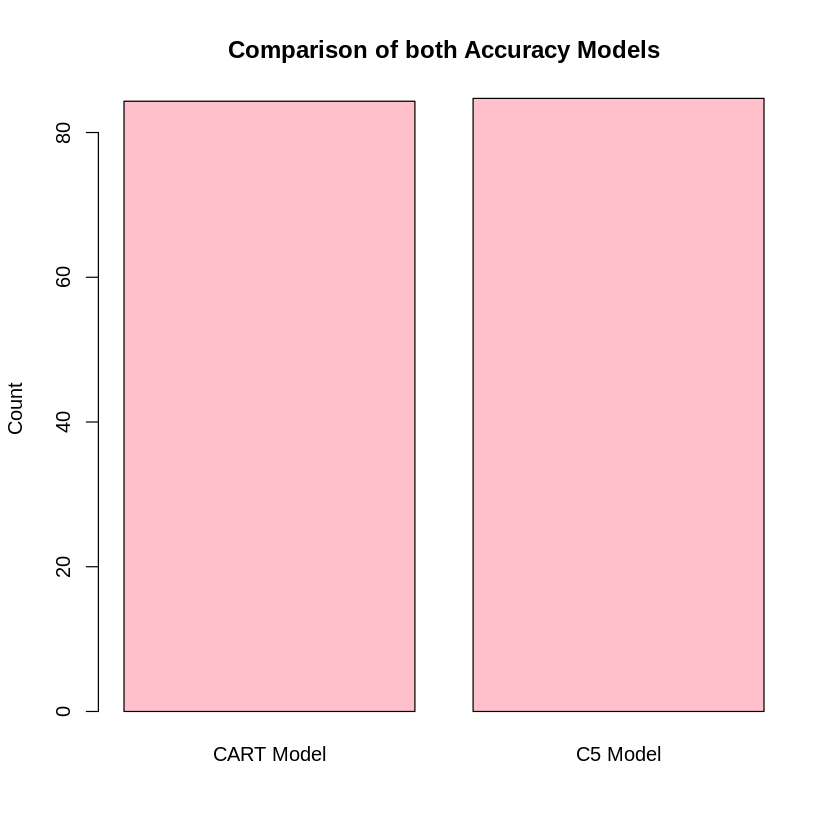

In [33]:
barplot(Comparison_AccuracyModel, col = "Pink", main = "Comparison of both Accuracy Models", ylab = "Count", names.arg = labels)

* We can conclude that by comparing both the accuracies of CART and C5 models, the accuracies are almost same for both the models where accuracy of CART = 84.32 and C5.0 = 84.71.

## **References:**

* http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/
* https://cran.r-project.org/web/packages/C50/vignettes/C5.0.html
* https://bookdown.org/dli/rguide/bar-graph.html